# Setup

In [1]:
import numpy as np
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Perceptrons

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target==0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

e:\python\python36_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [3]:
print(per_clf.coef_)
print(per_clf.intercept_)

[[-0.6 -1.2]]
[2.]


[0, 5, 0, 2]

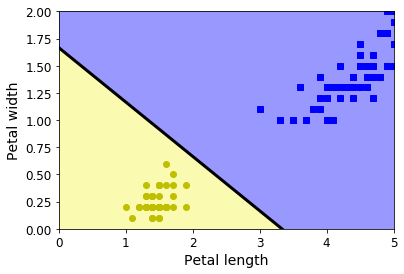

In [4]:
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_[0] / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]
x0 = np.linspace(axes[0], axes[1], 500)
x1 = np.linspace(axes[2], axes[3], 200)
x0s, x1s = np.meshgrid(x0, x1)          #meshgrid
X_new = np.c_[x0s.ravel(), x1s.ravel()]
y_pred = per_clf.predict(X_new)
zz = y_pred.reshape(x0s.shape)

plt.plot(X[y==1][:, 0], X[y==1][:, 1], "yo", label="Y")
plt.plot(X[y==0][:, 0], X[y==0][:, 1], "bs", label="N")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.contourf(x0s, x1s, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis(axes)

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(z, 0)

def derivative(f, z, eps=0.000001):
    return (f(z+eps)-f(z-eps)) / (2*eps)

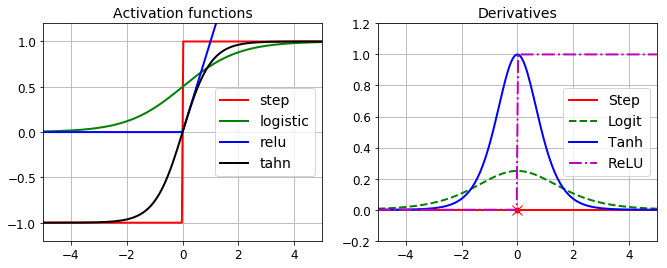

In [6]:
z = np.linspace(-5, 5 ,200)
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label='step')
plt.plot(z, logit(z), "g-", linewidth=2, label='logistic')
plt.plot(z, relu(z), "b-", linewidth=2, label='relu')
plt.plot(z, np.tanh(z), "k-", linewidth=2, label='tahn')
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

# heviside and sigmoid ???

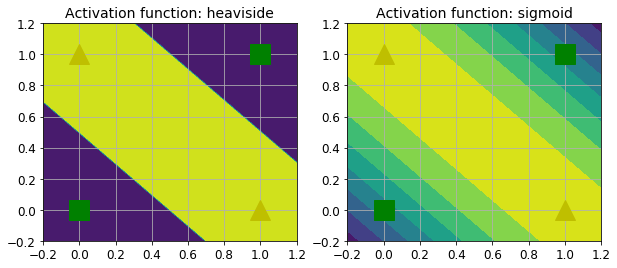

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for Mnist

## using estimator API

In [8]:
import tensorflow as tf

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [10]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300, 100], n_classes=10, feature_columns=feature_cols)
input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True
)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\admin\\AppData\\Local\\Temp\\tmpcl3ud4hv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000002FD1F828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for up

INFO:tensorflow:global_step/sec: 450.425
INFO:tensorflow:loss = 0.18384206, step = 6001 (0.222 sec)
INFO:tensorflow:global_step/sec: 427.327
INFO:tensorflow:loss = 2.3383937, step = 6101 (0.236 sec)
INFO:tensorflow:global_step/sec: 334.429
INFO:tensorflow:loss = 0.3562923, step = 6201 (0.297 sec)
INFO:tensorflow:global_step/sec: 444.419
INFO:tensorflow:loss = 0.69264007, step = 6301 (0.225 sec)
INFO:tensorflow:global_step/sec: 308.624
INFO:tensorflow:loss = 1.2596036, step = 6401 (0.324 sec)
INFO:tensorflow:global_step/sec: 462.937
INFO:tensorflow:loss = 1.0876585, step = 6501 (0.216 sec)
INFO:tensorflow:global_step/sec: 403.203
INFO:tensorflow:loss = 6.344127, step = 6601 (0.248 sec)
INFO:tensorflow:global_step/sec: 438.571
INFO:tensorflow:loss = 3.1107442, step = 6701 (0.228 sec)
INFO:tensorflow:global_step/sec: 454.52
INFO:tensorflow:loss = 1.4180644, step = 6801 (0.220 sec)
INFO:tensorflow:global_step/sec: 458.689
INFO:tensorflow:loss = 0.6843612, step = 6901 (0.218 sec)
INFO:tenso

INFO:tensorflow:loss = 0.07106869, step = 14201 (0.234 sec)
INFO:tensorflow:global_step/sec: 431.009
INFO:tensorflow:loss = 0.08209136, step = 14301 (0.229 sec)
INFO:tensorflow:global_step/sec: 442.453
INFO:tensorflow:loss = 0.0759976, step = 14401 (0.227 sec)
INFO:tensorflow:global_step/sec: 438.571
INFO:tensorflow:loss = 0.09858516, step = 14501 (0.227 sec)
INFO:tensorflow:global_step/sec: 408.14
INFO:tensorflow:loss = 0.11627134, step = 14601 (0.247 sec)
INFO:tensorflow:global_step/sec: 380.206
INFO:tensorflow:loss = 0.07747187, step = 14701 (0.262 sec)
INFO:tensorflow:global_step/sec: 438.571
INFO:tensorflow:loss = 0.40850338, step = 14801 (0.228 sec)
INFO:tensorflow:global_step/sec: 460.803
INFO:tensorflow:loss = 0.042162824, step = 14901 (0.217 sec)
INFO:tensorflow:global_step/sec: 448.405
INFO:tensorflow:loss = 0.15191516, step = 15001 (0.223 sec)
INFO:tensorflow:global_step/sec: 313.462
INFO:tensorflow:loss = 0.07524308, step = 15101 (0.318 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 431.01
INFO:tensorflow:loss = 0.013897449, step = 22401 (0.233 sec)
INFO:tensorflow:global_step/sec: 377.337
INFO:tensorflow:loss = 0.024136178, step = 22501 (0.264 sec)
INFO:tensorflow:global_step/sec: 404.835
INFO:tensorflow:loss = 0.06698021, step = 22601 (0.250 sec)
INFO:tensorflow:global_step/sec: 367.626
INFO:tensorflow:loss = 0.012892783, step = 22701 (0.269 sec)
INFO:tensorflow:global_step/sec: 442.453
INFO:tensorflow:loss = 0.044366486, step = 22801 (0.225 sec)
INFO:tensorflow:global_step/sec: 311.509
INFO:tensorflow:loss = 0.011534613, step = 22901 (0.322 sec)
INFO:tensorflow:global_step/sec: 442.453
INFO:tensorflow:loss = 0.04349845, step = 23001 (0.226 sec)
INFO:tensorflow:global_step/sec: 436.656
INFO:tensorflow:loss = 0.05374056, step = 23101 (0.229 sec)
INFO:tensorflow:global_step/sec: 427.326
INFO:tensorflow:loss = 0.09616221, step = 23201 (0.234 sec)
INFO:tensorflow:global_step/sec: 380.206
INFO:tensorflow:loss = 0.022809593, step = 233

INFO:tensorflow:global_step/sec: 438.571
INFO:tensorflow:loss = 0.006135852, step = 30501 (0.228 sec)
INFO:tensorflow:global_step/sec: 446.403
INFO:tensorflow:loss = 0.04863917, step = 30601 (0.224 sec)
INFO:tensorflow:global_step/sec: 438.571
INFO:tensorflow:loss = 0.034613125, step = 30701 (0.227 sec)
INFO:tensorflow:global_step/sec: 427.326
INFO:tensorflow:loss = 0.05731481, step = 30801 (0.235 sec)
INFO:tensorflow:global_step/sec: 465.09
INFO:tensorflow:loss = 0.036046863, step = 30901 (0.215 sec)
INFO:tensorflow:global_step/sec: 452.463
INFO:tensorflow:loss = 0.0028228054, step = 31001 (0.221 sec)
INFO:tensorflow:global_step/sec: 456.594
INFO:tensorflow:loss = 0.067775965, step = 31101 (0.219 sec)
INFO:tensorflow:global_step/sec: 444.42
INFO:tensorflow:loss = 0.03664256, step = 31201 (0.225 sec)
INFO:tensorflow:global_step/sec: 450.425
INFO:tensorflow:loss = 0.043590948, step = 31301 (0.222 sec)
INFO:tensorflow:global_step/sec: 458.689
INFO:tensorflow:loss = 0.020772845, step = 31

INFO:tensorflow:global_step/sec: 423.704
INFO:tensorflow:loss = 0.03972084, step = 38601 (0.235 sec)
INFO:tensorflow:global_step/sec: 403.203
INFO:tensorflow:loss = 0.003508986, step = 38701 (0.248 sec)
INFO:tensorflow:global_step/sec: 429.159
INFO:tensorflow:loss = 0.03562312, step = 38801 (0.234 sec)
INFO:tensorflow:global_step/sec: 357.123
INFO:tensorflow:loss = 0.005030793, step = 38901 (0.280 sec)
INFO:tensorflow:global_step/sec: 335.552
INFO:tensorflow:loss = 0.017228276, step = 39001 (0.298 sec)
INFO:tensorflow:global_step/sec: 471.671
INFO:tensorflow:loss = 0.05759567, step = 39101 (0.212 sec)
INFO:tensorflow:global_step/sec: 438.571
INFO:tensorflow:loss = 0.0053373417, step = 39201 (0.228 sec)
INFO:tensorflow:global_step/sec: 440.504
INFO:tensorflow:loss = 0.06421593, step = 39301 (0.227 sec)
INFO:tensorflow:global_step/sec: 448.405
INFO:tensorflow:loss = 0.00055937853, step = 39401 (0.224 sec)
INFO:tensorflow:global_step/sec: 311.509
INFO:tensorflow:loss = 0.058838908, step =

In [11]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-01-11:29:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\admin\AppData\Local\Temp\tmpcl3ud4hv\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-01-11:29:02
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9802, average_loss = 0.10207378, global_step = 44000, loss = 12.920732
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\admin\AppData\Local\Temp\tmpcl3ud4hv\model.ckpt-44000


In [12]:
eval_results

{'accuracy': 0.9802,
 'average_loss': 0.10207378,
 'loss': 12.920732,
 'global_step': 44000}

In [13]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\admin\AppData\Local\Temp\tmpcl3ud4hv\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -8.770588  ,  -3.072783  ,   1.350475  ,  -0.47954437,
         -5.2369804 ,  -8.108204  , -17.515373  ,  16.906542  ,
          0.16754586,   0.5119847 ], dtype=float32),
 'probabilities': array([7.0560897e-12, 2.1042124e-09, 1.7542280e-07, 2.8139659e-08,
        2.4165195e-10, 1.3684653e-11, 1.1239653e-15, 9.9999964e-01,
        5.3745985e-08, 7.5846195e-08], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object)}

# Using plain tensorflow

In [14]:
import tensorflow as tf

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [15]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [16]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b 
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [17]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [18]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [19]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [20]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [21]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [22]:
n_epochs = 40
batch_size = 50

In [23]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch , y_batch

In [24]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)
    
    saver_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.98 Val accuracy: 0.9134
1 Batch accuracy: 0.98 Val accuracy: 0.9312
2 Batch accuracy: 0.92 Val accuracy: 0.9408
3 Batch accuracy: 0.94 Val accuracy: 0.95


KeyboardInterrupt: 

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

In [ ]:
print("predictions:",y_pred)
print("actual:     ", y_test[: 20])

In [ ]:
#from tensorflow_graph_in_jupyter import show_graph


# using **dense()**

In [ ]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [ ]:
tf.reset_default_graph()

In [ ]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [ ]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [ ]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [ ]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_epochs = 20
n_batches = 50 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
            for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch:", acc_batch, "Valid:", acc_valid)
            
    saver.save(sess, "logs/my_model_final.ckpt")